#CEFET/RJ

**PPCIC - Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

---

**Regressão Logística e Regressão Softmax**

**Disciplina**: Aprendizado de Máquina

**Professor**: Eduardo Bezerra

**Aluno**: Janio de Souza Lima

#Introdução

A **Função Sigmoide** calcula um valor entre 0 e 1  correspondente a probabilidade estimada de uma instância pertencer a determinada classe, atribuindo-a à classe (1) caso a probabilidade seja maior que 0.5, caso contrário  atribuindo a instância à classe (0). [Géron, 2019].

---
Equação da Função Logística:

$
\sigma(z) = \frac{1}{1 + e^{-z}}
$

O código abaixo gera um exemplo da representação gráfica da função sigmoide a partir de sua aplicação em dados fictícios.


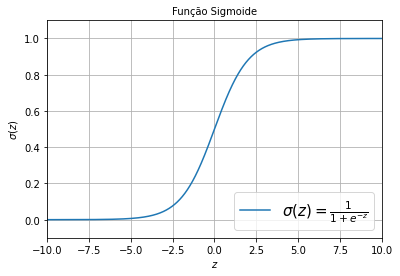

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sigmoid = lambda x: 1/(1+np.exp(-x))

def plot_sigmoid():
  plt.grid()
  plt.xlim([-10.0, 10.0])
  plt.ylim([-0.1, 1.1])
  xs = np.arange(-10, 10, 0.001)
  plt.xlabel('$z$', size=10)
  plt.ylabel('$\sigma(z)$', size=10)
  plt.title('Função Sigmoide', size=10)
  plt.plot(xs, sigmoid(xs), label=r'$\sigma(z)= \frac{1}{1+e^{-z}}$')
  plt.legend(loc='lower right', fontsize=15)

plot_sigmoid()

#1 Aplicação da Regessão Logística

O objetivo do treinamento é estimar o vetor de $\theta$ de modo que sejam probabilidades altas para instâncias positivas ($y=1$) e baixas probabilidades para instâncias negativas ($y=0$).

##1.1 Treinamento e Função de Custo da Regressão Logística

In [ ]:
#Carga dos dados
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
#X = Largura da pétala
X = iris['data'][:, 3:]

#Definie y = 1 se for Iris Virgínica (classe 2), caso contrário y = 0
y = (iris['target'] == 2).astype(np.int)

In [ ]:
#Criação do objeto com o algoritmo
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

#Treinamento do modelo
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##1.2 Aplicação do modelo treinado e visualização da fronteira de decisão

In [ ]:
#Gera uma série de valores distribuídos entre 0 e 3 de maneira similar
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

#Estima a probabilidade de cada instância pertencer ou não à classe y=1
y_proba = log_reg.predict_proba(X_new)

In [ ]:
import seaborn as sns

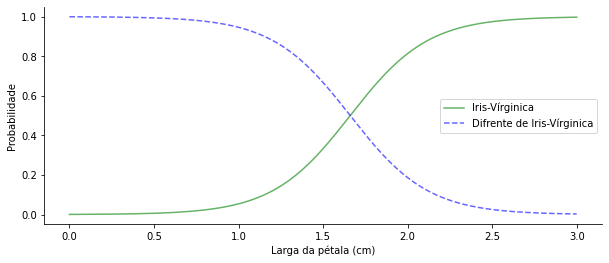

In [ ]:
#Visualização da classificação realizada
plt.figure(figsize=(10,4))
plt.plot(X_new, y_proba[:, 1],
         'g-', label='Iris-Vírginica', alpha=0.6)
plt.plot(X_new, y_proba[:, 0], 'b--',
         label='Difrente de Iris-Vírginica', alpha=0.6)
plt.xlabel('Larga da pétala (cm)')
plt.ylabel('Probabilidade')
plt.legend(loc='best')
sns.despine()

Na visualização a fronteira de decisão é representada pelo ponto em que ambas curvas se cruzam.

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

#2 Regressão Softmax ou Regressão Logística Multinomial

##2.1 Racional e equações

Esta abordagem refere-se ao uso da **Regressão Logística** generalizada para uso com múltiplas classes.

**Equação Softmax para classe $k$:**

$
s_k(x) = (\theta^{(k)})^T.x
$

Cada classe $k$ tem seu vetor $\theta^{(k)}$ que são armazenados como linhas na matriz de parâmetros $\Theta$.

**Função Softmax:**

$
\hat{P}_k = \sigma(s(x))_k = \frac{exp(s_k(x))}{\sum_{j=1}^{K}exp(s_j(x))}
$
* $K$: número de classes
* $s(x)$: vetor que contém pontuações de cada classes para $x$
* $\sigma(s(x))_k$ : probabilidade estimada de que $x$ pertença à classe $k$

**Previsão do classificador:**

$
\hat{y} = argmax_k \sigma(s(x)) = argmax_k s_k(x) = argmax_k ((\theta^{(k)})^T.x)
$

*OBSERVAÇÃO: Para aplicação do algoritmo, além destas funções também são usadas a função de custo de entropia cruzada e a função do vetor gradiente de entropia cruzada descritas em Géron [2019].*

##2.2 Treinamento do modelo

In [ ]:
#Define X como comprimento e largura da pétala
X = iris['data'][:, (2,3)]
y = iris['target']

In [ ]:
#Criando o objeto Regressão Softmax mudando os parâmetros da Regressão Logística
softmax_reg = LogisticRegression(multi_class='multinomial',
                                 solver='lbfgs',
                                 C=10)
#Treinando modelo
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Considerando uma instância hipotética de uma iris com com pétala apresentando 5cm de comprimento e 2cm de largura.

In [ ]:
#Aplicando modelo para predição
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
#Aplicando modelo para estimar probabilidade da classificação
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

##2.3 Aplicação do modelo treinado e visualização da fronteira de decisão

Simulando dados novos para realizar predições, estimativa de probabilidade e plotar a fronteira de decisão.

In [ ]:
#Criação de toy dataset para aplicação do modelo
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

In [ ]:
#Aplicação do modelo nos dados
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

(0.0, 7.0, 0.0, 3.5)

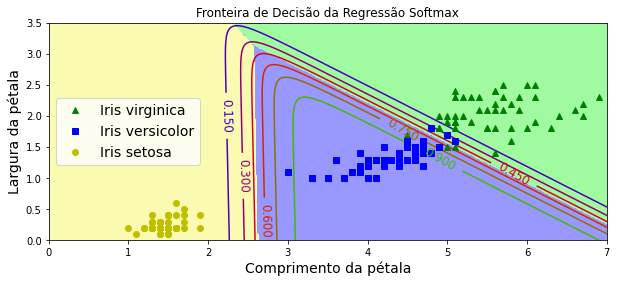

In [ ]:
#Plotando fronteira de decisão
plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
plt.title('Fronteira de Decisão da Regressão Softmax')

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel('Comprimento da pétala', fontsize=14)
plt.ylabel('Largura da pétala', fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

#Referências

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.